<a href="https://colab.research.google.com/github/BralexMtz/First-AI-Algorithms/blob/main/Lineal_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import torch.nn as nn # de redes neuronales para regresion lineal
import torch.optim as optim # para optimizar los gradientes y hacer un backpropagation
#Para graficar
import matplotlib.pyplot as plt

# Regresion Lineal
---

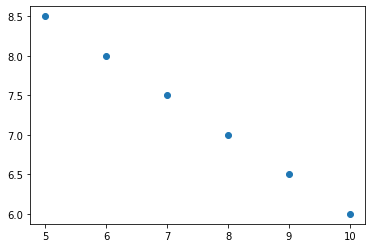

In [2]:
car_prices = [5,6,7,8,9,10]
units_sold = [8.5,8,7.5,7.0,6.5,6.0]
plt.scatter(car_prices, units_sold)

In [3]:
# de python a numpy
prices_array=np.array(car_prices).reshape(-1,1)
units_array=np.array(units_sold).reshape(-1,1)

prices_array

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [4]:
# de numpy a torch
# activamos el tensor con gradientes activados 
# para poder hacer el backpropagation en la construccion del modelo
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
# Aqui no activamos gradientes porque
# es nuestro target, lo que tratamos de explicar.
units = torch.from_numpy(units_array).float()

prices, prices.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

0.11377105116844177


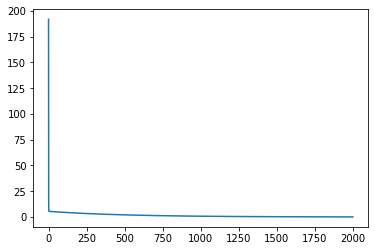

In [5]:
# Creamos un modelo lineal
model = nn.Linear(1,1)

# media del cuadrado de los valores
loss_function = nn.MSELoss()

# Stocastic Gradient Decent
optimizer = optim.SGD(model.parameters(), lr=0.01)
#                     ^                      ^
# los pesos dados a partir del modelo        LearningRate es el grado de cambio en cada iteración

# Ahora podemos hacer el entrenamiento y graficaremos las iteraciones
losses=[]
iterations = 2000
for i in range(iterations):
  #predecimos, ejecutar el forward pass con el modelo 
  pred = model(prices)
  # la perdida o diferencia a partir de la prediccion y el target
  loss = loss_function(pred, units)
  # agregar la perdida al arreglo para graficar
  losses.append(loss.data)

  # reiniciamos los gradientes para que no se acumulen en cada iteracion
  optimizer.zero_grad()
  # Para entrenar con backward, corregir
  loss.backward()
  # nos movemos un poco en dirección del meaning
  optimizer.step()


print(float(loss))
# graficamos las iteraciones con los losses
plt.plot(range(iterations),losses)


Aqui podemos ver que la perdida va disminuyendo en cada iteración de tal forma que cada vez nos acercamos más y más a los valores reales.


**En este punto el modelo ya se ha entrenado.**

Así que ya podemos predecir.

In [6]:
x = torch.Tensor([[4.0]])
p = model(x)
p

tensor([[8.2525]], grad_fn=<AddmmBackward>)

# Regresión Logística

---


In [7]:
#clasificacion binaria
n=100 
# 50 en la parte alta y 50 en la alta
h=n//2
dimen=2

data=np.random.randn(n,dimen)*3
data

array([[-2.36236176, -2.15776059],
       [ 1.08020284,  0.98351212],
       [-2.53857473,  3.96003529],
       [ 1.96257917,  1.58172444],
       [-0.62488436, -1.9122707 ],
       [-0.85275833, -1.79871897],
       [-4.41226993, -1.65496804],
       [-2.93401153, -1.58636323],
       [-2.03745959, -1.94287053],
       [ 1.99822955, -0.96402081],
       [ 1.5863626 , -2.2222932 ],
       [-4.05949188, -2.19737851],
       [-4.63034916,  0.24591667],
       [-1.52634151,  0.22344865],
       [ 4.19722372, -2.85966108],
       [-2.73306427, -1.69487969],
       [-1.25850891,  0.35312304],
       [-2.98426045, -1.01026135],
       [ 0.14095667, -1.77415339],
       [ 1.99648097,  4.30747157],
       [ 1.11261524,  2.73016684],
       [-0.59929695,  1.80391503],
       [-4.3101903 ,  4.881349  ],
       [ 3.18368887, -1.95970236],
       [-4.78237682, -0.45920389],
       [-5.64847742, -4.66573736],
       [ 1.49093277,  0.87373846],
       [ 0.89675928,  0.77839784],
       [ 0.84165322,

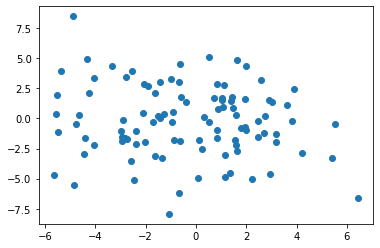

In [8]:
plt.scatter(data[:,0], data[:,1])

In [9]:
#enfocar cada grupo alrededor de su punto respectivo (-3,-3) 
data[:h,:]=data[:h,:]-3*np.ones((h,dimen))

In [10]:
# enfocar cada grupo alrededor de su punto respectivo (3,-3)
data[h:,:]=data[h:,:]+3*np.ones((h,dimen))

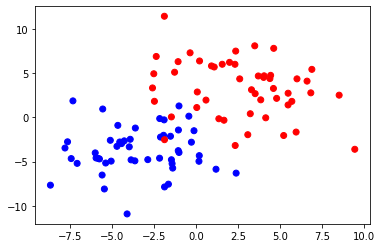

In [11]:
colors=['blue','red']
# arreglo de los colores.
color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)
plt.scatter(data[:,0], data[:,1], c=color)

In [12]:
target = np.array([0]*h + [1]*h).reshape(n,1)
x = torch.from_numpy(data).float().requires_grad_(True)

y = torch.from_numpy(target).float()

x.shape , y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

tensor(0.1175, grad_fn=<BinaryCrossEntropyBackward>)

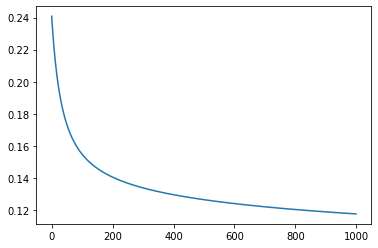

In [13]:
# son puntos por eso son 2 de entrada
model = nn.Sequential(
        nn.Linear(2,1),
        nn.Sigmoid()
      )
loss_function = nn.BCELoss()
optimizer= optim.SGD(model.parameters(), lr=0.015)

losses=[]
iterations=1000
for i in range(iterations):
  result=model(x)
  loss = loss_function(result,y)
  losses.append(loss.data)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

plt.plot(range(iterations),losses)
loss

In [14]:
blue= torch.Tensor([[-5,-6]])
# si el valor de la probabilidad es menor a 0.5 entonces es azul
prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])


red= torch.Tensor([[7.5,8]])
# si el valor de la probabilidad es mayor a 0.5 entonces es rojo
prediction = model(red).data[0][0] > 0.5
print(colors[prediction])


blue
red


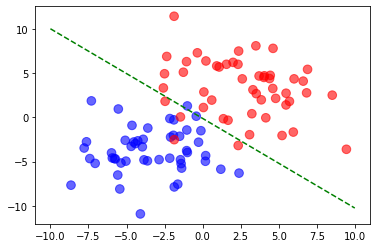

In [15]:
w = list(model.parameters())
w0=w[0].data.numpy()
w1=w[1].data.numpy()

plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

x_axis = np.linspace(-10,10,n)
y_axis = -(w1[0]+ x_axis*w0[0][0]) / w0[0][1]

plt.plot(x_axis, y_axis, 'g--')


Aquí podemos ver la manera en la que el modelo separa los datos de acuerdo al entrenamiento previo. 
Por lo que para las nuevas predicciones los puntos que se ubiquen sobre la linea serán rojos y los que estén bajo la linea serán azules.